In [1]:
import json
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../gen_lightcurves/gp_smoothed')

In [2]:
aligned_path = '../gen_lightcurves/gp_smoothed_aligned/'
lc_path = '../gen_lightcurves/gp_smoothed/'

#Select random lightcurve after looking
obj = 'SN2009an'
aligned_name = obj+'_aligned_lc.json'
lc_name = obj+'_gpsmoothed.json'

with open(aligned_path+aligned_name, 'r') as f:
    aligned_lc = json.load(f)
#with open(lc_path+lc_name, 'r') as f:
#    lc = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../gen_lightcurves/gp_smoothed/SN2009an_gpsmoothed.json'

In [10]:
mag_aligned = aligned_lc['g']['modelmag']
mjd_aligned = aligned_lc['g']['modeldate']
print(aligned_lc['g'].keys())
shift = aligned_lc['g']['shift']
mag_orig = aligned_lc['g']['mag']
mjd_orig = aligned_lc['g']['mjd']

mag = mag_aligned
mjd = np.array(mjd_aligned) + shift
mag_err = aligned_lc['g']['dmag']

dict_keys(['bsplinemag', 'dmag', 'goodstatus', 'kernel', 'mag', 'mjd', 'modeldate', 'modelerr', 'modelmag', 'shift', 'type'])


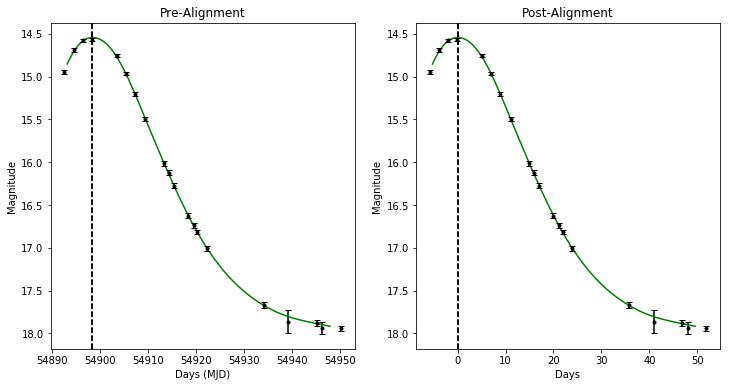

In [16]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#print(np.array(mjd_orig)-shift)

ax1.plot(mjd, mag, color='green')
ax1.errorbar(mjd_orig, mag_orig, fmt='o', ecolor='k', yerr=mag_err, color='k', markersize=3,capsize=3)
ax1.axvline(x=shift, linewidth=2, linestyle='dashed', color='black')
ax1.set_title('Pre-Alignment')
ax1.set_ylabel('Magnitude')
ax1.set_xlabel('Days (MJD)')
ax1.invert_yaxis()


ax2.plot(mjd_aligned, mag_aligned, color = 'green')
ax2.errorbar(np.array(mjd_orig)-shift, mag_orig, fmt='o', ecolor='k', yerr=mag_err, color='k', markersize=3,capsize=3)
ax2.axvline(linewidth=2, linestyle='dashed', color='black')
#ax2.axvline(x=mjd_aligned[0], linewidth=0.5, linestyle='dashed', color='black')
#ax2.axvline(x=mjd_aligned[-1], linewidth=0.5, linestyle='dashed', color='black')
ax2.set_ylabel('Magnitude')
ax2.set_xlabel('Days')
ax2.set_title('Post-Alignment')
ax2.invert_yaxis()

plt.show()
#plt.savefig('LCAlign.pdf')
#aligned_lc['g'].keys()